<a href="https://colab.research.google.com/github/saadspark/Machine-Learning/blob/main/Deep_Learning_CNNs_Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import kagglehub

path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog


['dogs', 'cats']
['dog.3443.jpg', 'dog.1942.jpg', 'dog.375.jpg', 'dog.3259.jpg', 'dog.790.jpg']
['cat.3498.jpg', 'cat.891.jpg', 'cat.2842.jpg', 'cat.1.jpg', 'cat.115.jpg']


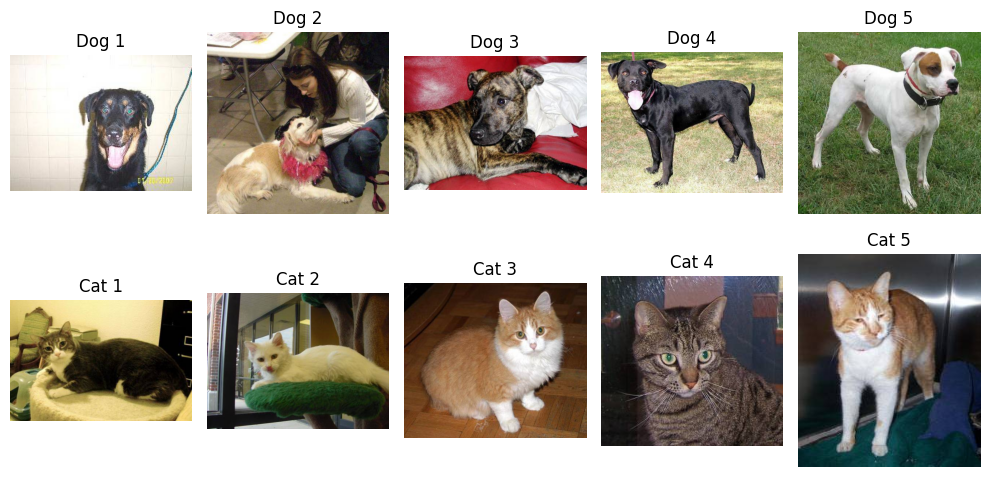

In [3]:
import cv2

file_path = os.path.join(path, "training_set/training_set")
list_of_files = os.listdir(file_path)
print(os.listdir(file_path))
dogs_path = os.path.join(file_path, list_of_files[0])
dog_img_list = os.listdir(dogs_path)
print(dog_img_list[0:5])
cats_path = os.path.join(file_path, list_of_files[1])
cats_img_list = os.listdir(cats_path)
print(cats_img_list[0:5])

plt.figure(figsize=(10, 5))
for i in range(5):
    dog_img_path = os.path.join(dogs_path, dog_img_list[i])
    dog_img = cv2.imread(dog_img_path)
    dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 1)
    plt.imshow(dog_img)
    plt.title(f"Dog {i+1}")
    plt.axis('off')

    cat_img_path = os.path.join(cats_path, cats_img_list[i])
    cat_img = cv2.imread(cat_img_path)
    cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 5, i + 6)
    plt.imshow(cat_img)
    plt.title(f"Cat {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Preprocessing**

Resize images to smaller shape (say 128×128) to save memory.

Normalize pixel values (0–255 → 0–1).

In [4]:
from sklearn.model_selection import train_test_split

data = []
labels = []
IMG_SIZE = 64

path = os.path.join(kagglehub.dataset_download("tongpython/cat-and-dog"), "training_set/training_set")
categories = ["cats", "dogs"] # Define categories

for category in categories: # Iterate through categories
    category_path = os.path.join(path, category)
    for file in os.listdir(category_path): # Iterate through files in each category
        label = 0 if category == "cats" else 1  # cat=0, dog=1
        img_path = os.path.join(category_path, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label)
        else:
            print(f"Warning: Could not read image file: {img_path}")

data = np.array(data) / 255.0
labels = np.array(labels)

print("Dataset shape:", data.shape, labels.shape)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Dataset shape: (8005, 64, 64, 3) (8005,)


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 69s 653ms/step - accuracy: 0.5818 - loss: 1.0433 - val_accuracy: 0.5409 - val_loss: 0.7370
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 79s 624ms/step - accuracy: 0.6698 - loss: 0.6027 - val_accuracy: 0.5122 - val_loss: 0.9526
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 63s 624ms/step - accuracy: 0.7022 - loss: 0.5764 - val_accuracy: 0.5315 - val_loss: 0.9314
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 67s 669ms/step - accuracy: 0.7459 - loss: 0.5158 - val_accuracy: 0.6402 - val_loss: 0.6483
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 78s 622ms/step - accuracy: 0.7895 - loss: 0.4550 - val_accuracy: 0.6384 - val_loss: 0.7794
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 85s 661ms/step - accuracy: 0.8030 - loss: 0.4226 - val_accuracy: 0.7745 - val_loss: 0.4632
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 64s 629ms/step - accuracy: 0.8320 - loss: 0.3795 - val_accuracy: 0.7458 - val_loss: 0.5151
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 66s 657ms/step - accuracy: 0.8619 - loss: 0

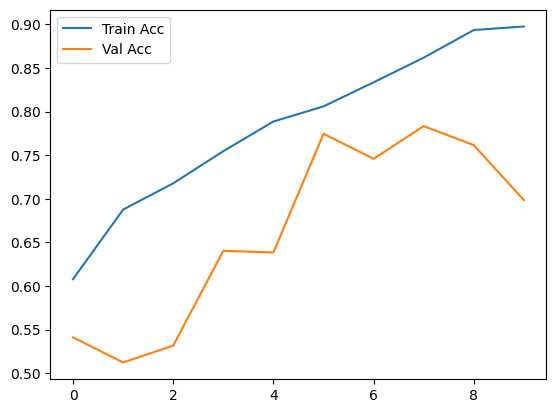

In [7]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


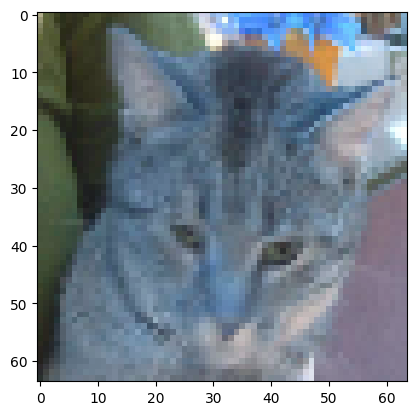

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: Cat 🐱


In [13]:
index = 199
plt.imshow(x_test[index])
plt.show()

pred = model.predict(x_test[index].reshape(1, IMG_SIZE, IMG_SIZE, 3))
print("Prediction:", "Dog 🐶" if pred > 0.5 else "Cat 🐱")


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step


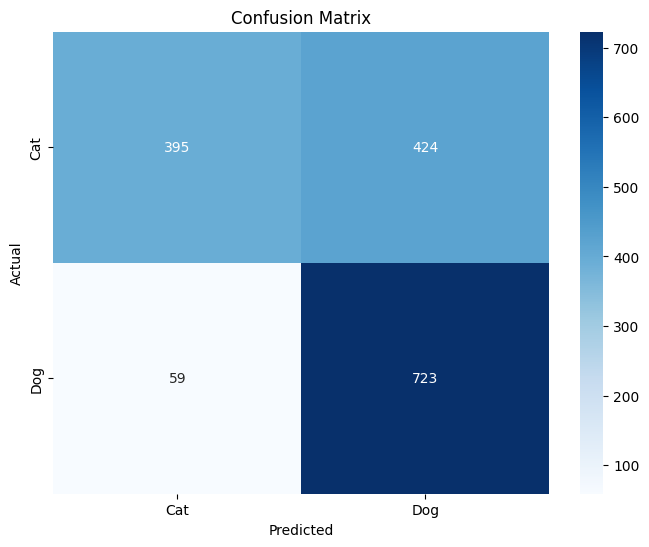

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes on the test set
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training Accuracy: 0.8975639939308167
Validation Accuracy: 0.6983135342597961
